# Yuk diskusi bareng untuk menyelesaikan kasus berikut dengan AB testing

##**Case 1**

Sebuah e-commerce akan meluncurkan landing page baru, namun perlu diketahui apakah landing baru bisa meningkatkan conversion rate. Dengan mengerti nilai conversion rate tersebut, management e commerce dapat membuat kebijakan untuk tetap launching page baru atau tidak.

1. Lalukan import data yang sudah disediakan

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import random
import seaborn as sns
plt.style.use("fivethirtyeight")

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/Dataset AB Testing/ab_data.csv')

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


2. Lakukan managing data dengan python, mengubah kategori pada kolom converted menjadi: \
0 : Not converted \
1 : Converted

In [6]:
df['converted']=df['converted'].apply({0:"Not Converted",1:"Converted"}.get)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,Not Converted
1,804228,2017-01-12 08:01:45.159739,control,old_page,Not Converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,Not Converted
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,Not Converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,Converted


3. Lakukan eksplorasi data, dengan melihat apakah ada yang missing, dan buatlah boxplot untuk melakukan perbandingan?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.2+ MB


In [8]:
df["landing_page"] = df["landing_page"].apply(lambda x: str(x))
df["group"] = df["group"].apply(lambda x: str(x))
df["converted"] = df["converted"].apply(lambda x: str(x))

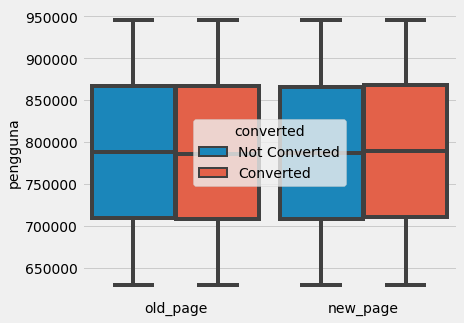

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.boxplot(x=df["landing_page"], y=df["user_id"], width=0.9, hue=df["converted"])
ax.set_ylabel('pengguna', size=14)
ax.set_xlabel("")
ax.tick_params(labelsize=14)
plt.savefig('avg_time_spend.png')
plt.show()

4. Buatlah tabel contingency dan hitunglah conversion rate? Analisislah

In [10]:
contingency=pd.crosstab(df.converted,df.landing_page)
contingency

landing_page,new_page,old_page
converted,,
Converted,17498,17739
Not Converted,129741,129500


In [11]:
dfc={
    'Converted':['Converted','Non Converted'],
     'New Page':[17498,129741],
     'Old Page':[17739,129500]
}
dfc=pd.DataFrame(dfc)
dfc

,Converted,New Page,Old Page
0,Converted,17498,17739
1,Non Converted,129741,129500


In [12]:
def rel_uplift(dataframe):
  cr_aa = dataframe.iloc[0,1]/dataframe.iloc[1,1]
  cr_bb = dataframe.iloc[0,2]/dataframe.iloc[1,2]
  hasil = (cr_bb - cr_aa)/cr_aa
  return hasil
rel_uplift(dfc)

0.01565963810094572

5. Buatlah uji statistik yang sesuai untuk mengetahui perbedaan dari landing page tersebut

In [13]:
alpha=0.05
test_res = stats.ttest_ind(df[df['landing_page'] == 'new_page']["user_id"], 
                      df[df['landing_page'] == 'old_page']["user_id"],
                      equal_var=False)
print(f'p-value for single sided test: {test_res.pvalue / 2:.4f}')
if test_res.pvalue <= alpha:
    print('Reject null hypothesis)')
else:
    print('Do not reject null hypothesis')

p-value for single sided test: 0.1627
Do not reject null hypothesis


In [14]:
df['converted']=df['converted'].apply({"Not Converted":0,"Converted":1}.get)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
alpha=0.05
test_res = stats.ttest_ind(df[df['landing_page'] == 'new_page']["converted"], 
                      df[df['landing_page'] == 'old_page']["converted"],
                      equal_var=False)
print(f'p-value for single sided test: {test_res.pvalue / 2:.4f}')
if test_res.pvalue <= alpha:
    print('Reject null hypothesis)')
else:
    print('Do not reject null hypothesis')

p-value for single sided test: 0.0856
Do not reject null hypothesis
